# **Building a Naive Bayes Classifier for Spam Detection**

Naïve Bayes classifier is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
It is mainly used in text classification that includes a high-dimensional training dataset.
Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.


**About dataset:**

The ***SMS Spam Collection*** dataset is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. The files contain one message per line. Each line is composed of two columns: v1 contains the label (ham or spam) and v2 contains the raw text. For more information about dataset please follow the link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

**Import necessary libraries**

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**Load the dataset**

In [4]:
spam_df = pd.read_csv('spam.csv', encoding='latin-1')

**Preview the data**

In [5]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
spam_df.shape

(5572, 5)

In [7]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


***Drop unnecessary features***

In [8]:
spam_df = spam_df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [9]:
spam_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
spam_df.shape

(5572, 2)

***Rename the remaining columns***

In [11]:
spam_df = spam_df.rename(columns={'v1': 'label', 'v2': 'text'})

In [12]:
spam_df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


***Split data into training and testing set***

In [13]:
train_data = spam_df[:4400]
test_data = spam_df[4400:]
print(train_data.shape)
print(test_data.shape)

(4400, 2)
(1172, 2)


***Vectorize the text data***

Convert the text data into numerical format that can be used by the Naive Bayes classifier. We'll use the **CountVectorizer** class from scikit-learn to do this.


In [14]:
# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data to transform it into vectors
train_vectors = vectorizer.fit_transform(train_data["text"])

The fit_transform() method first fits the CountVectorizer object on the training data, which means it learns the vocabulary of all unique words present in the sentences. After learning the vocabulary, fit_transform() then transforms the training data into vectors, where each vector represents the frequency of each word in the vocabulary in the corresponding sentence. 

In [15]:
#print the vocabulary learnt by vectoriser
print(vectorizer.vocabulary_)

{'go': 3139, 'until': 7131, 'jurong': 3857, 'point': 5256, 'crazy': 2041, 'available': 1131, 'only': 4919, 'in': 3613, 'bugis': 1536, 'great': 3210, 'world': 7545, 'la': 3970, 'buffet': 1534, 'cine': 1798, 'there': 6784, 'got': 3178, 'amore': 919, 'wat': 7341, 'ok': 4889, 'lar': 4001, 'joking': 3827, 'wif': 7453, 'oni': 4915, 'free': 2965, 'entry': 2601, 'wkly': 7507, 'comp': 1898, 'to': 6889, 'win': 7466, 'fa': 2726, 'cup': 2095, 'final': 2833, 'tkts': 6877, '21st': 356, 'may': 4376, '2005': 348, 'text': 6740, '87121': 673, 'receive': 5591, 'question': 5498, 'std': 6423, 'txt': 7046, 'rate': 5545, 'apply': 999, '08452810075over18': 68, 'dun': 2465, 'say': 5887, 'so': 6238, 'early': 2483, 'hor': 3463, 'already': 893, 'then': 6780, 'nah': 4650, 'don': 2381, 'think': 6799, 'he': 3338, 'goes': 3146, 'usf': 7171, 'lives': 4138, 'around': 1045, 'here': 3377, 'though': 6817, 'freemsg': 2971, 'hey': 3387, 'darling': 2146, 'it': 3732, 'been': 1273, 'week': 7381, 'now': 4814, 'and': 933, 'no': 

The **vocabulary** is a dictionary where each key is a word in the corpus and the corresponding value is an integer index that represents that word in the vectorized representation. In the example above, the word "go" has the index 3139, "until" has the index 7131, and so on.

In [16]:
print(train_vectors)

  (0, 3139)	1
  (0, 7131)	1
  (0, 3857)	1
  (0, 5256)	1
  (0, 2041)	1
  (0, 1131)	1
  (0, 4919)	1
  (0, 3613)	1
  (0, 1536)	1
  (0, 3210)	1
  (0, 7545)	1
  (0, 3970)	1
  (0, 1534)	1
  (0, 1798)	1
  (0, 6784)	1
  (0, 3178)	1
  (0, 919)	1
  (0, 7341)	1
  (1, 4889)	1
  (1, 4001)	1
  (1, 3827)	1
  (1, 7453)	1
  (1, 4915)	1
  (2, 3613)	1
  (2, 2965)	1
  :	:
  (4397, 2225)	1
  (4397, 5937)	1
  (4397, 6066)	1
  (4397, 748)	2
  (4397, 5845)	1
  (4397, 4023)	1
  (4397, 7254)	1
  (4397, 1912)	1
  (4397, 2511)	1
  (4397, 7683)	1
  (4398, 4138)	1
  (4398, 3732)	1
  (4398, 4976)	1
  (4398, 7345)	1
  (4398, 7638)	1
  (4398, 3859)	1
  (4398, 4204)	1
  (4398, 4866)	1
  (4398, 2845)	1
  (4398, 2162)	1
  (4399, 3139)	1
  (4399, 5928)	1
  (4399, 3862)	1
  (4399, 3172)	1
  (4399, 5489)	1


Train vectors looks like:

(sentence no., word no. in vocab) frequency of a word

(0, 3139)	1

(0, 7131)	1

Where (0, 3139) represents in first sentence (#0) word no. 3139 apprears one time in the sentence.


In [17]:
# Transform the testing data into vectors
test_vectors = vectorizer.transform(test_data["text"])

***Train Naive Bayes classifier***

In [18]:
# Create a Multinomial Naive Bayes classifier object
nb_classifier = MultinomialNB()

# Train the classifier on the training vectors and labels
nb_classifier.fit(train_vectors, train_data["label"])


MultinomialNB()

***Make predictions on the test data***

In [19]:
# Use the trained classifier to make predictions on the test vectors
predictions = nb_classifier.predict(test_vectors)

***Evaluate Model Performance using accuracy***

In [20]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(test_data["label"], predictions)

# Print the accuracy of the classifier
print("Accuracy:", accuracy)

Accuracy: 0.9863481228668942


***Visualize the Model Performance using confusion matrix***

In [21]:
# Print the confusion matrix of the classifier
print("Confusion Matrix:")
print(confusion_matrix(test_data["label"], predictions))


Confusion Matrix:
[[1015    8]
 [   8  141]]


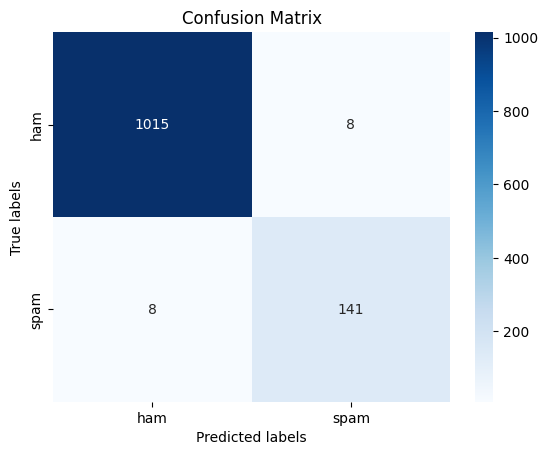

In [22]:
cm = confusion_matrix(test_data["label"], predictions)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
# Add labels, title, and axis ticks
ax.xaxis.set_ticklabels(['ham', 'spam'])
ax.yaxis.set_ticklabels(['ham', 'spam'])

# Show the plot
plt.show()